In [1]:
import pandas as pd

In [2]:
path = r"C:\Users\Asus\Desktop\CHemtech\data_pi.csv"

df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60510 entries, 0 to 60509
Data columns (total 2 columns):
timestamp    60510 non-null object
PI_71        60510 non-null float64
dtypes: float64(1), object(1)
memory usage: 945.6+ KB


In [4]:
df

,timestamp,PI_71
0,2020-04-27 15:30:00,272.0000
1,2020-04-27 16:30:00,272.0000
2,2020-04-27 19:30:00,272.0000
3,2020-04-27 20:30:00,272.0000
4,2020-04-27 21:30:00,272.0000
...,...,...
60505,2020-08-05 19:13:45,327.6910
60506,2020-08-05 19:14:51,327.9803
60507,2020-08-05 19:15:28,327.9803
60508,2020-08-05 19:16:10,328.1250


In [5]:
df.isna().sum()

timestamp    0
PI_71        0
dtype: int64

In [6]:
df.iloc[:,1].plot(kind ='hist', figsize = (15,10), grid = True)

In [7]:
df.columns

Index(['timestamp', 'PI_71'], dtype='object')

In [8]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60510 entries, 0 to 60509
Data columns (total 2 columns):
timestamp    60510 non-null datetime64[ns]
PI_71        60510 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 945.6 KB


In [10]:
df.describe()

,PI_71
count,60510.000000
mean,279.636115
std,76.820794
min,70.023150
25%,244.502300
50%,278.790500
75%,321.759200
max,756.221100


In [11]:
df.index = df.timestamp

In [12]:
df

,timestamp,PI_71
timestamp,,
2020-04-27 15:30:00,2020-04-27 15:30:00,272.0000
2020-04-27 16:30:00,2020-04-27 16:30:00,272.0000
2020-04-27 19:30:00,2020-04-27 19:30:00,272.0000
2020-04-27 20:30:00,2020-04-27 20:30:00,272.0000
2020-04-27 21:30:00,2020-04-27 21:30:00,272.0000
...,...,...
2020-08-05 19:13:45,2020-08-05 19:13:45,327.6910
2020-08-05 19:14:51,2020-08-05 19:14:51,327.9803
2020-08-05 19:15:28,2020-08-05 19:15:28,327.9803


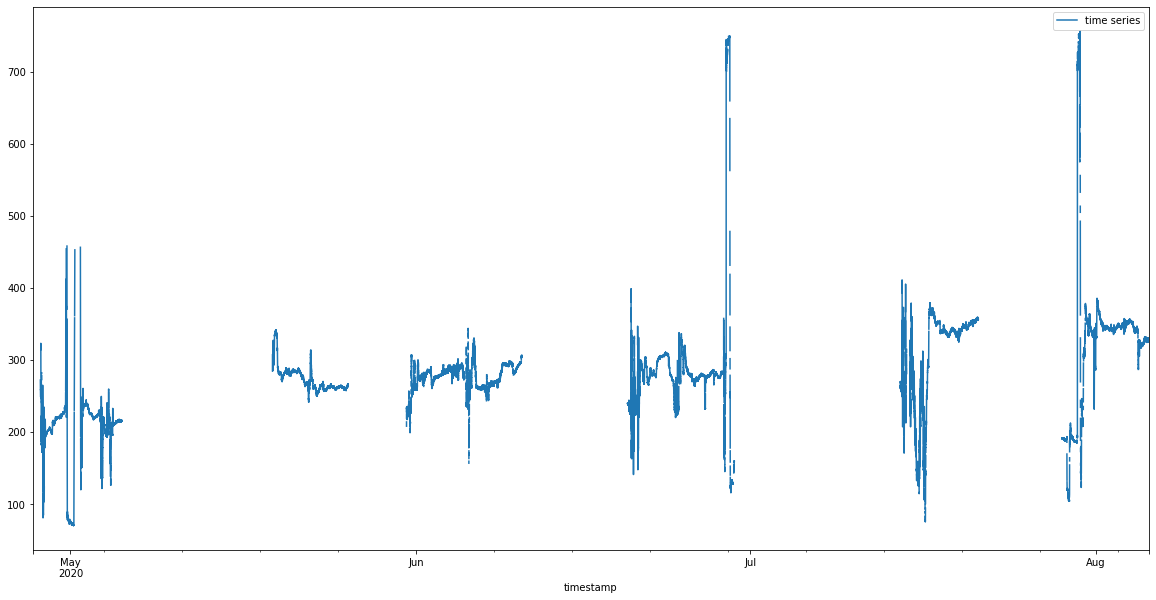

In [13]:
import matplotlib.pyplot as plt

# Check out of train and test data sets
fig, ax = plt.subplots(figsize = (20,10))
df_day = df.resample('1T')['PI_71'].first()

ax = df_day.plot(label = 'time series', grid =True)

#gr_day_test.plot(color='r',label = 'test')
ax.legend()
#ax.axvline(train.index.max(),linestyle = '--',color = 'r')
plt.grid()
